## **Install Packages**

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:

import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install statsmodels
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install scipy
!{sys.executable} -m pip install scikit_learn


In [9]:
#import required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
import scipy
from matplotlib.pyplot import figure


In [10]:
# Load the data as a data frame by using URL

soccer_data_url="https://data.hemath.com/access/file_csv/1_Soccer_Data.csv"
df = pd.read_csv(soccer_data_url)

In [11]:
#view top 3 entries from the soccer data

df.head(3)

,PlayerName,Club,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
0,"Braund, Mr. Owen Harris",MUN,3.96,7.5,37.5,12.3,60,20.56,109.1,63.32,195.9,78.9,19.75
1,"Allen, Mr. William Henry",MUN,4.41,8.3,38.2,12.7,68,20.67,102.8,58.55,189.7,74.4,21.30
2,"Moran, Mr. James",MUN,4.14,5.0,36.4,11.6,21,21.86,104.6,55.36,177.8,69.1,19.88


In [12]:
df.columns

Index(['PlayerName', 'Club', 'DistanceCovered(InKms)', 'Goals',
       'MinutestoGoalRatio', 'ShotsPerGame', 'AgentCharges', 'BMI', 'Cost',
       'PreviousClubCost', 'Height', 'Weight', 'Score'],
      dtype='object')

## **Exploratory Data Analysis**


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PlayerName              202 non-null    object 
 1   Club                    202 non-null    object 
 2   DistanceCovered(InKms)  202 non-null    float64
 3   Goals                   202 non-null    float64
 4   MinutestoGoalRatio      202 non-null    float64
 5   ShotsPerGame            202 non-null    float64
 6   AgentCharges            202 non-null    int64  
 7   BMI                     202 non-null    float64
 8   Cost                    202 non-null    float64
 9   PreviousClubCost        202 non-null    float64
 10  Height                  202 non-null    float64
 11  Weight                  202 non-null    float64
 12  Score                   202 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 20.6+ KB


In [14]:
# descriptive statistics

df.describe()

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4.718614,7.108663,43.091584,14.566337,76.876238,22.955891,69.021782,64.873713,180.103960,75.008168,13.507426
std,0.457976,1.800549,3.662989,1.362451,47.501239,2.863933,32.565333,13.070197,9.734494,13.925574,6.189826
min,3.800000,3.300000,35.900000,11.600000,8.000000,16.750000,28.000000,34.360000,148.900000,37.800000,5.630000
25%,4.372500,5.900000,40.600000,13.500000,41.250000,21.082500,43.850000,54.667500,174.000000,66.525000,8.545000
50%,4.755000,6.850000,43.500000,14.700000,65.500000,22.720000,58.600000,63.035000,179.700000,74.400000,11.650000
75%,5.030000,8.275000,45.575000,15.575000,97.000000,24.465000,90.350000,74.750000,186.175000,84.125000,18.080000
max,6.720000,14.300000,59.700000,19.200000,234.000000,34.420000,200.800000,106.000000,209.400000,123.200000,35.520000


## **Correlation**

Correlation coefficient is used to measure the strength of relationship between two variables. It indicates that as the value of one variable changes the other variable changes in a specific direction with some magnitude. There are various ways to find correlation between two variables, one of which is Pearson correlation coefficient.
It measures the linear relationship between two continuous variables.
 
Let's say $x$ and $y$ are two continuous variables, the Pearson correlation coefficient between them can be found by the following formula.
 
 
$$r = \frac{ \sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y}) }{%
        \sqrt{\sum_{i=1}^{n}(x_i-\bar{x})^2}\sqrt{\sum_{i=1}^{n}(y_i-\bar{y})^2}}$$
 
where $x_i$ and $y_i$ represents the $i^{th}$ value of the variables.
The value of $r$ ranges between $-1$ and $+1$.
 
Their strength of relationship is measured by the absolute value of coefficient, whereas the sign of the coefficient indicates the direction of the relationship.
 



In [15]:
df.corr()

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
DistanceCovered(InKms),1.000000,0.147098,0.924964,0.888800,0.250865,0.299471,-0.403004,0.550975,0.358854,0.403743,-0.493512
Goals,0.147098,1.000000,0.153333,0.134721,0.131973,0.177032,0.137131,0.102734,0.076958,0.155844,0.108114
MinutestoGoalRatio,0.924964,0.153333,1.000000,0.950757,0.258240,0.320527,-0.449135,0.583375,0.371192,0.423699,-0.532449
ShotsPerGame,0.888800,0.134721,0.950757,1.000000,0.308391,0.382524,-0.435429,0.610986,0.352322,0.455255,-0.531522
AgentCharges,0.250865,0.131973,0.258240,0.308391,1.000000,0.302556,-0.108243,0.317581,0.123255,0.273686,-0.183386
BMI,0.299471,0.177032,0.320527,0.382524,0.302556,1.000000,0.321116,0.713858,0.337097,0.845955,0.187558
Cost,-0.403004,0.137131,-0.449135,-0.435429,-0.108243,0.321116,1.000000,-0.207749,-0.071253,0.154227,0.963017
PreviousClubCost,0.550975,0.102734,0.583375,0.610986,0.317581,0.713858,-0.207749,1.000000,0.802119,0.930904,-0.361850
Height,0.358854,0.076958,0.371192,0.352322,0.123255,0.337097,-0.071253,0.802119,1.000000,0.780906,-0.188022
Weight,0.403743,0.155844,0.423699,0.455255,0.273686,0.845955,0.154227,0.930904,0.780906,1.000000,-0.000162


The correlation between DistanceCovered(InKms) and the target variable score $-0.49$ indicates negative correlation.
The variable cost is related to the target variable with correlation coefficient $0.96$ which indicates strong positive relationship. 

## **Relationship between Cost and Score**

Score and Cost have a 96% correlation, making it a significant variable. Cost can be selected as the predictor variable for simple linear regression since the scatter plot between them will demonstrate a linear relationship.


To see this relationship visually, let's plot the scatter plot for Cost and Score.


Text(0.5, 1.0, 'Scatter plot between Cost and Score')

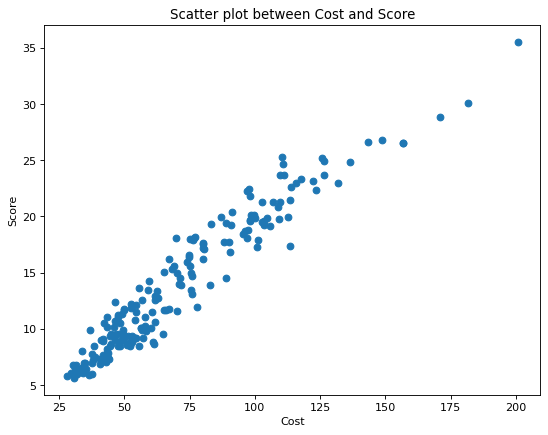

In [16]:
#Let's plot cost vs. score

figure(figsize=(8, 6), dpi=80)
plt.scatter(df['Cost'], df['Score'])

# label

plt.xlabel("Cost")
plt.ylabel("Score")
plt.title("Scatter plot between Cost and Score")

# Strong linear association between cost and score, maybe some concern with model after a cost of 125 or so!

## **Train - Test Split**

In [17]:
# Assign x, y then do training testing split

x=df['Cost']
y=df['Score']

# Splitting with 75% training, 25% testing data

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.75,
                                                    test_size = 0.25, random_state = 100)

The data is first assigned to input variable (x) and output variable (y) accordingly, then the train test split function from sklearn is used to perform splitting into a ratio of 75:25 with a random state of 100. The random state is a seed given to randomly generate indices for train and test sets.

## **Linear Regression**

Linear Regression is a statistical approach to modeling the linear relationship between predictor variables and the target variable.

These variables are known as the independent and dependent variables, respectively. 


When there is one independent variable, it is known as **simple linear regression**. When there are more independent variables, it is called **multiple linear regression**.

**Simple Linear Regression**:   $\hat y = \beta_0+\beta_1x+\epsilon$


**Multiple Linear Regression**: $\hat y = \beta_0+\beta_1x_1+\dots \beta_px_p+\epsilon$ where $p$ is... number of features in the model



Linear regression serves two primary functions: understanding variable relationships and forecasting:
 
* The coefficients represent the estimated magnitude and direction (positive/negative) of each independent variable's relationship with the dependent variable.
*  A linear regression equation predicts the mean value of the dependent variable given the values of the independent variables. So, it enables us to forecast.
 
 
**Example:** Assume your father owns an ice cream shop. Sometimes there is too much ice cream in the store, and other times there isn't enough to sell.
You notice that ice cream sales are much higher on hot days than on cold days.
There appears to be some correlation between the temperature and the sale of ice cream.
 
Now you must determine the optimal number of ice creams to store in order to sell enough and have little left over at the end of the day.
 
How can you forecast the sale for the next few days?
 
Is there any way to predict the sale of the next day given the temperature of the last few days?
 
Yes, you can use simple linear regression to model the relationship between temperature and sales.
 
 
<br>
 
Now that we are clear on the why let's go ahead to the "how" part of linear regression.
 
<br>


## **Mathematics behind Linear Regression**
 
Here's the formula for simple linear regression.
 
$$y=\beta_0+\beta_1x+\epsilon$$
 
 
Let's understand each of the terms involved:
* For any given value of the independent variable (x), y is the predicted value for the dependent variable (y).
* $\beta_0$ represents the intercept, or the predicted value of y when x is 0.
* $\beta_1$is the regression coefficient, which tells us how much y will change as x increases.
* x is the independent or predictor variable that helps us predict y
* $\epsilon$ is the error left due to not so accurate calculation of the regression coefficients.
 
 
Linear regression determines the best fit line across your data by looking for the regression coefficient (B1) that minimizes the model's total error (e).
 
<br>


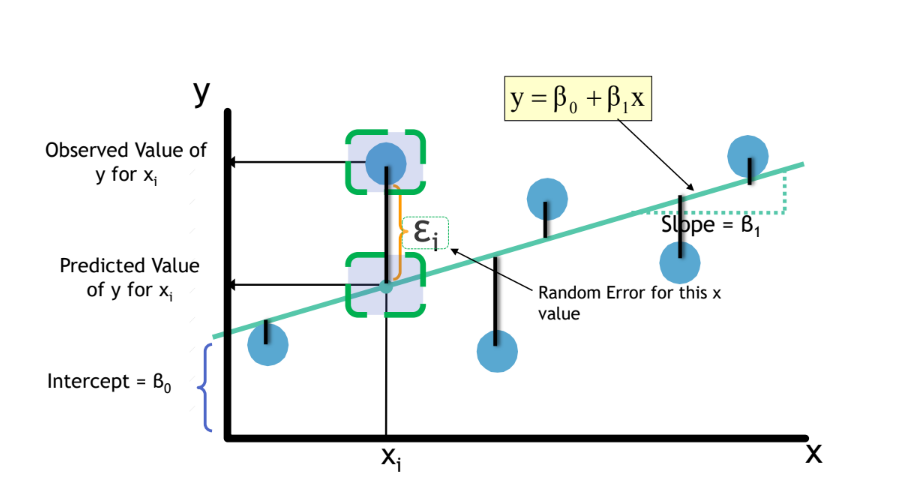

Let's understand the regression line with the example graph above. 

* The $\beta_0$ parameter indicates the intercept or the constant value of y when x is 0.

* The $\beta_1$ parameter is the slope or steepness of the regression line.

* The distance between the predicted value of y on the regression line and the corresponding true value of y is basically the error.




In [18]:
#statsmodels approach to regression
# fit the model
lr = sm.OLS(y_train, x_train).fit()

# Printing the parameters
lr.params
lr.summary()

#force intercept term
x_train_with_intercept = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_with_intercept).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     1976.
Date:                Sat, 17 Jun 2023   Prob (F-statistic):           6.91e-88
Time:                        19:57:05   Log-Likelihood:                -293.23
No. Observations:                 151   AIC:                             590.5
Df Residuals:                     149   BIC:                             596.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9472      0.325      2.916      0.0

## **Model Summary**
 
Now that we have successfully modeled let's evaluate the results and summary of the model:
 
* $R^2$: The $R^2$ or the coefficient of determination is the proportion of the variance in the dependent variable that is explained from the independent variable(s). $R^2$ is expressed between 0 and 1 for the level of variance explained.
As we learned in the previous section, the ratio $\frac{SSE}{TSS}$ should be low for a robust model, this ratio signifies the error or unexplained variance by the independent variable(s).
Mathematically, $R^2$ or explained variance can be expressed as:
 
$$ R^2 = 1 - \frac{SSE}{TSS} $$
* We got an $R^2$ of **0.93** which is pretty good.
 
* Adjusted $R^2$: For linear models, adjusted $R^2$ is a corrected goodness-of-fit statistic. It determines the proportion of variance in the target field explained by the input or inputs.
$R^2$ tends to overestimate the goodness-of-fit of the linear regression. It always grows as the number of independent variables in the model grows.
It happens because we tend to deduct a large amount (due to multiple variables) to calculate error as the number of independent variables increases. Hence, the ratio $\frac{SSE}{TSS}$ is even lower than it should be and  $R^2$ seems to be high but it might not be an appropriate model for production data. It is adjusted to account for this overestimation. Considering N as the total sample size and p as the number of independent variables, adjusted $R^2$ can be expressed as:

$$ \text{Adjusted }  R^2 = 1 - \frac{(1 - R^2)(N - 1)}{N - p - 1} $$
 
 
* F-Statistic: F-Statistic can be used for hypothesis testing about whether the slope is meaningful or not. F-statistics is a statistic used to test the significance of regression coefficients in linear regression models. F-statistics can be calculated as MSR/MSE where MSR represents the mean sum of squares regression and MSE represents the mean sum of squares error.
The null hypothesis is that the slope is 0 or there is no relationship between the predictor and target variables. If the value of F-statistics is greater than the critical value, we can reject the null hypothesis and conclude that there’s a significant relationship between the predictor variables and the response variable.
 
 
* Prob (F-Statistic): The p-value of the f statistic is very small, which basically means what are the odds that the null hypothesis is true and we observe the same result due to random chance, and the odds are very small that $H_0 : \beta_1$ is 0, highly unlikely that the model is not good, and highly likely that the slope is not zero.
 
 


const    0.947185
Cost     0.182083
dtype: float64


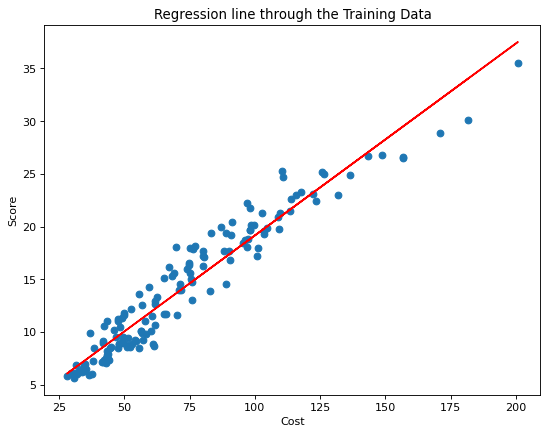

In [19]:
#Extract the B0, B1
print(lr.params)
b0=lr.params[0]
b1=lr.params[1]

#Plot the fitted line on training data
figure(figsize=(8, 6), dpi=80)
plt.scatter(x_train, y_train)

plt.plot(x_train, b0+ b1*x_train, 'r')
plt.xlabel("Cost")
plt.ylabel("Score")
plt.title("Regression line through the Training Data")

plt.show()

In this plot, we are extracting the values of the intercept $\beta_0$ and coefficient/slope $\beta_1$ and plotting the regression line over the scatter plot of the Cost and Score of training data.
 
The regression line has a good fitting, it probably deviates a little after a cost of 125 or so, let's see if we can improve it in the later sections when we diagnose and remedy but first let's see how our model performs on the test data.


## **Prediction on Test Data**

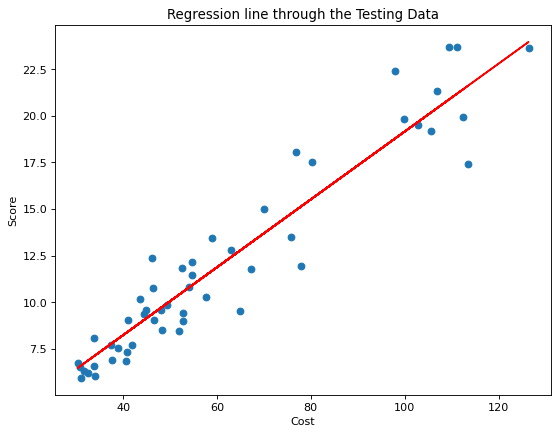

In [20]:
#Plot the fitted line on test data
x_test_with_intercept = sm.add_constant(x_test)
y_test_fitted = lr.predict(x_test_with_intercept)


# scatter plot on test data
figure(figsize=(8, 6), dpi=80)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_test_fitted, 'r')
plt.xlabel("Cost")
plt.ylabel("Score")
plt.title("Regression line through the Testing Data")

plt.show()

## **Diagnostics and Remedies**
 
As we learned in the previous section, Linear Regression follows some assumptions. The section Diagnostics and Remedies is evaluating if the data follows the assumptions or not, whether Linear Regression is a good fit for the patterns in the data, and simply includes the things we do in order to assess how well the model performs. The following are the things we look for in the data to diagnose Linear Regression as an unfit model:
 
* **Non-Linearity**: First thing to look for is non-linearity, for example, your data might look linear for some time, and then it shows non-linearity and a parabola would fit better than a straight line.
 
* **Heteroscedasticity**: meaning non-constant variance, variance in one region may not be the same as in the second region.
 
* **Independence**: Errors are not independent and identically distributed.
 
* **Outliers**: Outliers can have a large impact on the model, for example, if there's a slow-growing regression line and there is an outlier up in the center, it will pull the regression line upwards than most of the data.
 
* **Missing Features**: Missing predictor variables, no need in a simple linear regression, which simply means losing on variables that can be useful but are not included.


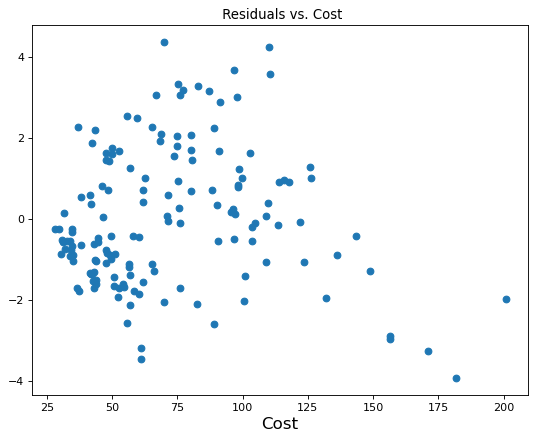

In [21]:
#DIAGNOSTICS

#CHECKLIST:
# NON-LINEARITY
# NON-CONSTANT VARIANCE
# DEVIATIONS FROM NORMALITY
# ERRORS NOT IID
# OUTLIERS
# MISSING PREDICTORS



#Build predictions on training data
predictions_y = lr.predict(x_train_with_intercept)

#Find residuals
r_i = (y_train - predictions_y)


#Residuals vs. predictor in training data
figure(figsize=(8, 6), dpi=80)
plt.title(' Residuals vs. Cost')
plt.xlabel('Cost',fontsize=15)
plt.scatter(x_train, r_i)
plt.show()

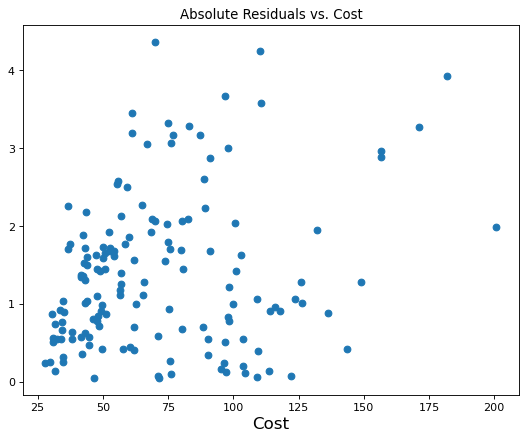

In [22]:
#Absolute residuals against predictor
abs_r_i = np.abs(y_train - predictions_y)
figure(figsize=(8, 6), dpi=80)
plt.title('Absolute Residuals vs. Cost')
plt.xlabel('Cost',fontsize=15)
plt.scatter(x_train, abs_r_i)
plt.show()

((array([-2.60603471, -2.28639722, -2.10324767, -1.97158309, -1.867224  ,
         -1.7799545 , -1.70445293, -1.63757876, -1.57731662, -1.52229259,
         -1.47152616, -1.42429196, -1.3800376 , -1.33833223, -1.29883298,
         -1.26126233, -1.22539231, -1.19103324, -1.1580255 , -1.12623343,
         -1.09554071, -1.06584677, -1.03706405, -1.0091158 , -0.98193434,
         -0.95545967, -0.92963831, -0.90442237, -0.87976879, -0.85563868,
         -0.83199678, -0.80881102, -0.78605212, -0.76369328, -0.74170987,
         -0.7200792 , -0.69878032, -0.67779383, -0.65710172, -0.6366872 ,
         -0.61653466, -0.59662946, -0.57695791, -0.55750713, -0.53826504,
         -0.51922023, -0.50036191, -0.48167989, -0.4631645 , -0.44480656,
         -0.42659733, -0.40852846, -0.39059201, -0.37278035, -0.35508619,
         -0.33750252, -0.32002258, -0.3026399 , -0.28534819, -0.26814138,
         -0.25101361, -0.23395916, -0.2169725 , -0.20004822, -0.18318105,
         -0.16636584, -0.14959754, -0.

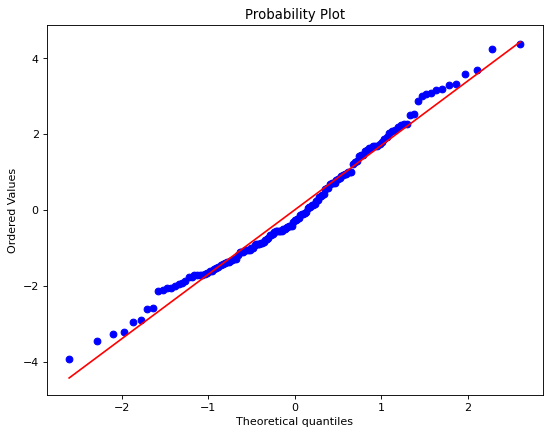

In [23]:
#Normality plot
figure(figsize=(8, 6), dpi=80)
scipy.stats.probplot(r_i,plot=plt)

<Figure size 640x480 with 0 Axes>

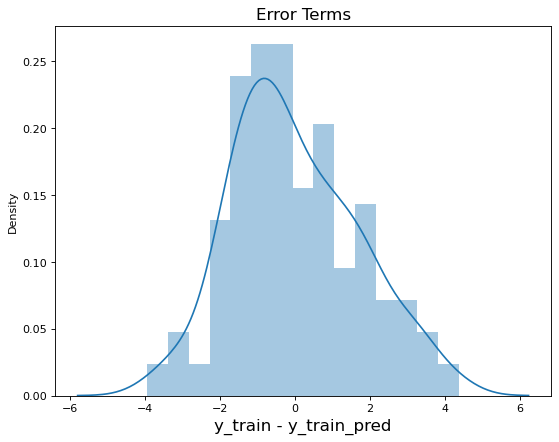

In [24]:
#Tails might be a little heavy, but overall no clear reason to reject normality expectations
# Evaluate normality through histogram of residuals
# Plotting the histogram using the residual values

fig = plt.figure()
figure(figsize=(8, 6), dpi=80)
sns.distplot(r_i, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

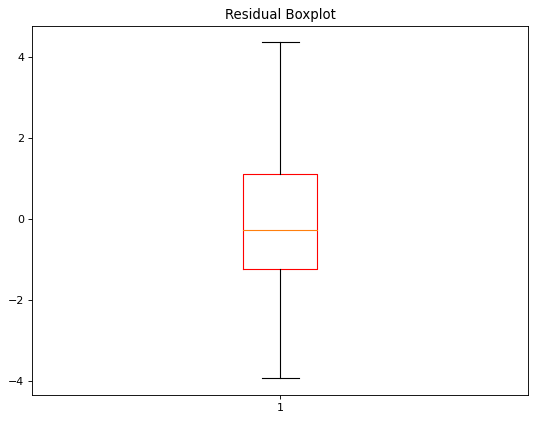

In [25]:
#Boxplot for outliers
# plot
figure(figsize=(8, 6), dpi=80)
plt.boxplot(r_i, boxprops=dict(color='red'))
plt.title('Residual Boxplot');


### **Transformations to avoid non-constant variance**

Non-constant variance can be a problem in linear regression, as the assumption of constant variance of the errors is a key requirement for the ordinary least squares (OLS) method to be unbiased and efficient. When this assumption is violated, the regression coefficients can be inefficient and/or the predictions can be biased. To avoid non-constant variance, there are different data transformations that can be applied.

* Log transformation: This transformation is often used when the variance of the data increases with the mean. A log transformation can be used to stabilize the variance by converting the data into logarithmic values.

* Square root transformation: This transformation is also used to stabilize the variance by converting the data into square root values.

* Box-Cox transformation: This is a statistical transformation that is used to stabilize the variance by transforming the data into values that are closer to a normal distribution. The Box-Cox transformation is a more flexible and powerful transformation compared to the log and square root transformations.

* Yeo-Johnson transformation: This is a newer and more flexible version of the Box-Cox transformation that can handle both positive and negative data values.

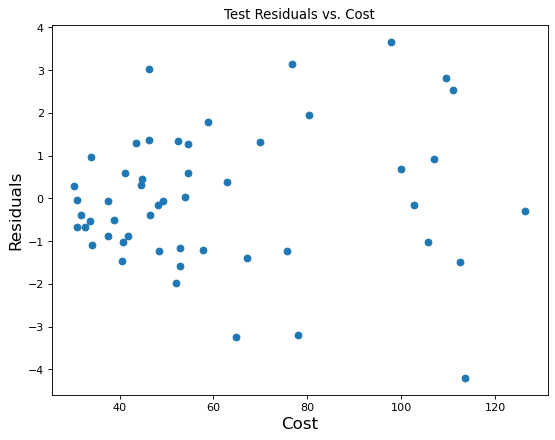

In [26]:
#Demo of how to deal with non-constant variance through transformations

test_residuals=(y_test-y_test_fitted)
len(y_test)
len(y_test_fitted)
len(test_residuals)

#Residuals vs. predictor in test set
figure(figsize=(8, 6), dpi=80)
plt.title('Test Residuals vs. Cost')
plt.xlabel('Cost',fontsize=15)
plt.ylabel('Residuals',fontsize=15)
plt.scatter(x_test, test_residuals)
plt.show()

#Some evidence of non-constant variance

We can see the scatter of data points increases as we increase the cost. This is evidence of Heteroscedasticity.
 
We'll try different transformations such as square root, log, and box-cox to see if we can introduce linearity with these transformations.

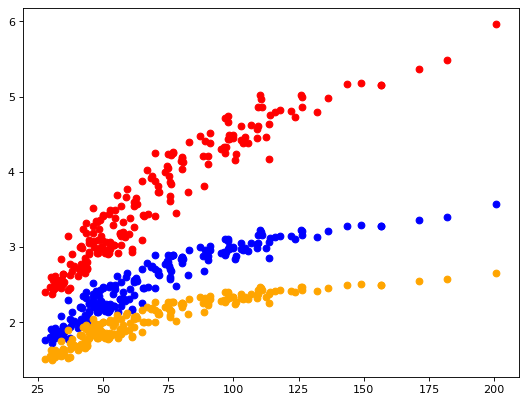

In [27]:


#Try sqrt
sqrt_y=np.sqrt(y)
figure(figsize=(8, 6), dpi=80)
plt.scatter(x, sqrt_y,color='red');

#Try ln
ln_y=np.log(y)
plt.scatter(x, ln_y,color='blue');


#Let's try a BC transformation

#Box Cox procedure on all cost
bc_y=list(stats.boxcox(y))
bc_y=bc_y[0]
plt.scatter(x, bc_y,color='orange');

#Overall, most satisfied with the sqrt transformation

We can observe that the square root transformation denoted by red dots gives the most linear scatter of data points. Let's try to run the linear regression model on the transformed variable and analyze the change in results.

In [28]:
#Run regression on this set

x_train, x_test, y_train, y_test = train_test_split(x, sqrt_y, train_size = 0.75,
                                                    test_size = 0.25, random_state = 100)


#force intercept term
x_train_with_intercept = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_with_intercept).fit()
print(lr.summary())


                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     1267.
Date:                Sat, 17 Jun 2023   Prob (F-statistic):           9.72e-75
Time:                        19:57:09   Log-Likelihood:                -17.200
No. Observations:                 151   AIC:                             38.40
Df Residuals:                     149   BIC:                             44.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9674      0.052     37.683      0.0

We can see the change in $R^2$ and Adjusted $R^2$ after the transformation. They are almost similar which suggests that $R^2$ is no longer overestimating the variance explained by the predictor variable.

const    1.967367
Cost     0.023433
dtype: float64


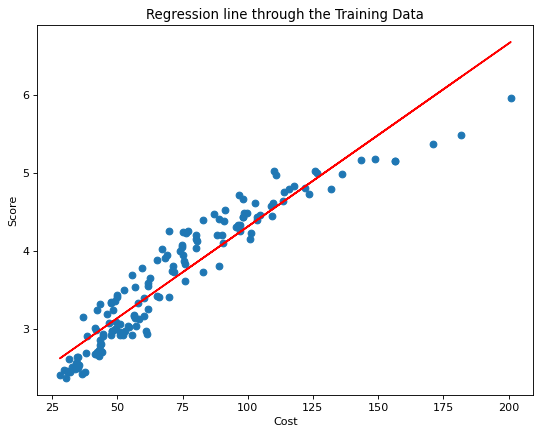

In [29]:
#Extract the B0, B1
print(lr.params)
b0=lr.params[0]
b1=lr.params[1]

#Plot the fitted line on training data
figure(figsize=(8, 6), dpi=80)
plt.scatter(x_train, y_train)
plt.plot(x_train, b0+ b1*x_train, 'r')
plt.xlabel("Cost")
plt.ylabel("Score")
plt.title("Regression line through the Training Data")
plt.show()

We extracted the linear regression coefficients and plotted the regression line on the Cost vs Score scatter plot.

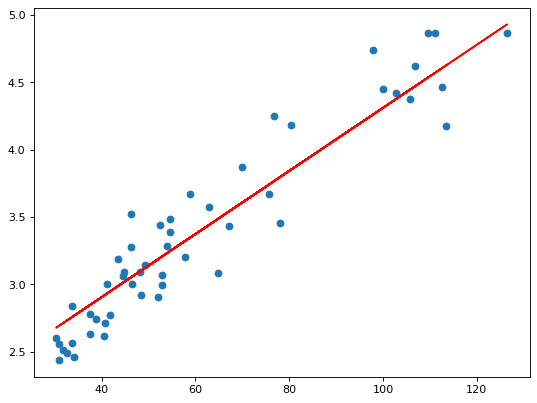

In [30]:
#Plot the fitted line on test data

x_test_with_intercept = sm.add_constant(x_test)
y_test_fitted = lr.predict(x_test_with_intercept)

figure(figsize=(8, 6), dpi=80)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_test_fitted, 'r')
plt.show()

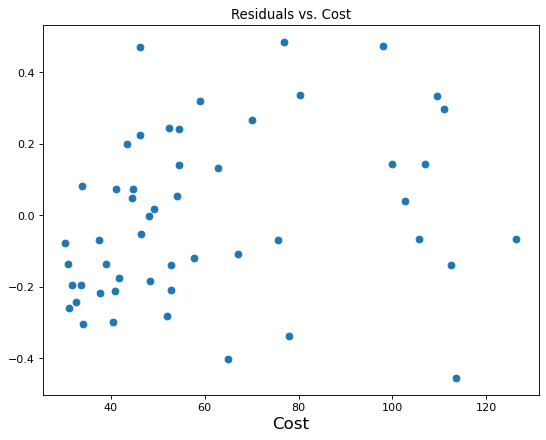

In [31]:
#Evaluate variance
#Diagnostics
test_residuals=(y_test-y_test_fitted)
len(y_test)
len(y_test_fitted)
len(test_residuals)

#Residuals vs. predictor
figure(figsize=(8, 6), dpi=80)
plt.title('Residuals vs. Cost')
plt.xlabel('Cost',fontsize=15)
plt.scatter(x_test, test_residuals)
plt.show()

#Non-constant variance reduced, but we also reduced our coefficient of determination